In [ ]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re

In [ ]:
df = pd.read_csv('Mega Jaya Clean 1.csv')
df

<ipython-input-22-e8d8c87dd5b6>:1: DtypeWarning: Columns (14,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Mega Jaya Clean 1.csv')


,Unnamed: 0,Order Date,Channel,Store,Sales Order ID,Order Reference No.,Payment Status,Fulfillment Status,Payment Type,Payment Date,...,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Order Note,Picklist ID,Package ID,Shipment ID,Invoice ID,Return ID
0,0,30/06/2023 23:31 WIB,Shopee,SP-Powertec,SO-133433816,230701RG19MXN8,Paid,Completed,Online Payment,2023-01-07 21:05:00,...,Kab. Badung,80361,Bali,Indonesia,NaN,NaN,NaN,SHP-50034434,INV-7493225,NaN
1,1,30/06/2023 23:24 WIB,Tokopedia,TP-Megajaya,SO-133433690,INV/20230630/MPL/3320394135,Paid,Completed,BCA Virtual Account,2023-06-30 23:24:00,...,Kab. Tangerang,15810,Banten,Indonesia,NaN,NaN,NaN,SHP-49984546,INV-7397140,NaN
2,2,30/06/2023 22:44 WIB,Shopee,SP-Megajaya,SO-133432932,230630RDE5VAJQ,Cancelled,Cancelled,Online Payment,1970-01-01 07:00:00,...,Kota Bengkulu,38121,Bengkulu,Indonesia,NaN,NaN,NaN,SHP-50001316,NaN,NaN
3,3,30/06/2023 22:13 WIB,Tokopedia,TP-Powertec,SO-133432239,INV/20230630/MPL/3320319767,Paid,Completed,BCA Virtual Account,2023-06-30 22:13:00,...,Kab. Bandung,40218,Jawa Barat,Indonesia,NaN,NaN,NaN,SHP-49984769,INV-7411676,NaN
4,9,30/06/2023 22:05 WIB,Tokopedia,TP-Megajaya,SO-133432071,INV/20230630/MPL/3320309963,Paid,Completed,BNI Virtual Account,2023-06-30 22:05:00,...,Kota Pontianak,78241,Kalimantan Barat,Indonesia,NaN,NaN,NaN,SHP-49984244,INV-7482559,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45121,72224,24/01/2022 12:10 WIB,Blibli,BB-Powertec,SO-116502231,12089781034,Paid,Delivered,NaN,2022-01-14 19:45:00,...,Kota Magelang,56122,Jawa Tengah,Indonesia,NaN,NaN,NaN,SHP-33573168,NaN,NaN
45122,72225,24/01/2022 12:04 WIB,Bukalapak,BL-Powertec,SO-116501977,223224624444,Paid,Delivered,dana,2022-01-17 10:05:00,...,Kota Tangerang Selatan,15431,Banten,Indonesia,NaN,NaN,NaN,SHP-33572837,NaN,NaN
45123,72230,24/01/2022 11:58 WIB,Bukalapak,BL-Megajaya,SO-116501738,223223354700,Paid,Delivered,virtual_account,2022-01-13 10:22:00,...,Kota Administrasi Jakarta Barat,11460,D.K.I. Jakarta,Indonesia,NaN,NaN,NaN,SHP-33572678,NaN,NaN
45124,72250,23/01/2022 09:36 WIB,Tokopedia,TP-Toyohoist,SO-116465865,INV/20220122/MPL/1970067427,Paid,Delivered,Transfer Manual,2022-01-23 09:36:00,...,Kab. Bantaeng,92451,Sulawesi Selatan,Indonesia,NaN,NaN,NaN,SHP-33569117,NaN,NaN


#Check Missing Values

In [ ]:
df.isnull().sum()

Unnamed: 0                         0
Order Date                         0
Channel                            0
Store                              1
Sales Order ID                     0
Order Reference No.                0
Payment Status                     0
Fulfillment Status                 0
Payment Type                    3789
Payment Date                     743
Shipping Label Printed Date    12771
Ready to Ship Date             22907
Shipped Date                   21013
Delivered Date                 28769
Completed Date                 43284
Cancelled Date                 43979
Shipping Courier                1485
Service Type                     191
AWB                            14676
Customer Name                      0
Currency Code                      0
Item Name In Marketplace           0
Item Note                      43617
Item Name in SAP                   0
Item Group                         0
Item Group Detail                  0
Brand                              0
S

In [ ]:
df.loc[df['Payment Status'] == 'Cancelled', 'Payment Date'] = 0
df[['Payment Status', 'Payment Date']].head(50)

,Payment Status,Payment Date
0,Paid,2023-01-07 21:05:00
1,Paid,2023-06-30 23:24:00
2,Cancelled,0
3,Paid,2023-06-30 22:13:00
4,Paid,2023-06-30 22:05:00
5,Paid,2023-06-30 21:44:00
6,Paid,2023-06-30 21:43:00
7,Paid,2023-06-30 21:32:00
8,Paid,2023-06-30 21:30:00
9,Paid,2023-06-30 21:22:00


In [ ]:
# Define the date columns again
date_cols = ['Shipping Label Printed Date', 'Ready to Ship Date', 'Shipped Date',
             'Delivered Date', 'Completed Date', 'Cancelled Date', 'Payment Date']

# Convert date columns to datetime format
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Mengisi 'Payment Type' dengan "Kosong" jika 'Payment Status' adalah 'Cancelled'
df.loc[df['Payment Status'] == 'Cancelled', 'Payment Type'] = "Cancelled"

# Mengisi NaN dengan 0 untuk kolom yang ditentukan
columns_to_fill = [
    "Payment Type", "Payment Date", "Shipping Label Printed Date",
    "Ready to Ship Date", "Shipped Date", "Delivered Date",
    "Completed Date", "Cancelled Date"
]
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Menampilkan beberapa baris data untuk konfirmasi perubahan
df[columns_to_fill].head(10)

,Payment Type,Payment Date,Shipping Label Printed Date,Ready to Ship Date,Shipped Date,Delivered Date,Completed Date,Cancelled Date
0,Online Payment,2023-01-07 21:05:00,2023-03-07 09:39:00,2023-03-07 09:21:00,2023-03-07 21:13:00,2023-08-07 18:16:00,2023-08-07 22:21:00,0
1,BCA Virtual Account,2023-06-30 23:24:00,2023-01-07 09:14:00,2023-01-07 10:21:00,2023-01-07 11:11:00,2023-01-07 18:18:00,2023-03-07 18:19:00,0
2,Cancelled,1970-01-01 00:00:00,0,0,0,0,0,0
3,BCA Virtual Account,2023-06-30 22:13:00,2023-01-07 09:02:00,2023-01-07 10:23:00,2023-01-07 14:13:00,2023-03-07 11:44:00,2023-03-07 15:59:00,0
4,BNI Virtual Account,2023-06-30 22:05:00,2023-01-07 09:14:00,2023-08-07 10:00:00,2023-01-07 12:50:00,2023-08-07 10:00:00,2023-08-07 11:12:00,0
5,ShopeePay,2023-06-30 21:44:00,2023-01-07 09:14:00,2023-01-07 09:10:00,2023-01-07 14:22:00,2023-04-07 12:28:00,2023-04-07 12:47:00,0
6,BCA Virtual Account,2023-06-30 21:43:00,2023-01-07 09:14:00,2023-07-07 14:26:00,2023-01-07 14:22:00,2023-05-07 14:25:00,2023-07-07 14:26:00,0
7,SPayLater,2023-06-30 21:32:00,2023-01-07 09:11:00,2023-01-07 09:09:00,2023-01-07 14:13:00,2023-03-07 14:00:00,2023-03-07 14:28:00,0
8,Online Payment,2023-06-30 21:30:00,2023-01-07 09:11:00,2023-01-07 09:09:00,2023-01-07 14:13:00,2023-04-07 17:04:00,2023-06-07 15:38:00,0
9,SPayLater,2023-06-30 21:22:00,2023-01-07 09:14:00,2023-01-07 09:10:00,2023-01-07 14:22:00,2023-07-07 18:38:00,0,0


In [ ]:
# Mengisi 'Completed Date' dengan 'Order Date' untuk entri yang memiliki 'Payment Type' yang tidak "Kosong" atau "Cancelled",
# 'Payment Date' yang tidak kosong, dan 'Completed Date' yang kosong
condition_complete = (df['Payment Type'] != "Kosong") & (df['Payment Date'] != 0) & (df['Completed Date'] == 0)
df.loc[condition_complete, 'Completed Date'] = df.loc[condition_complete, 'Order Date']

# Menampilkan beberapa baris dari df untuk konfirmasi perubahan
df[['Payment Status', 'Payment Type', 'Order Date', 'Payment Date', 'Completed Date']].head(10)

,Payment Status,Payment Type,Order Date,Payment Date,Completed Date
0,Paid,Online Payment,30/06/2023 23:31 WIB,2023-01-07 21:05:00,2023-08-07 22:21:00
1,Paid,BCA Virtual Account,30/06/2023 23:24 WIB,2023-06-30 23:24:00,2023-03-07 18:19:00
2,Cancelled,Cancelled,30/06/2023 22:44 WIB,1970-01-01 00:00:00,30/06/2023 22:44 WIB
3,Paid,BCA Virtual Account,30/06/2023 22:13 WIB,2023-06-30 22:13:00,2023-03-07 15:59:00
4,Paid,BNI Virtual Account,30/06/2023 22:05 WIB,2023-06-30 22:05:00,2023-08-07 11:12:00
5,Paid,ShopeePay,30/06/2023 21:44 WIB,2023-06-30 21:44:00,2023-04-07 12:47:00
6,Paid,BCA Virtual Account,30/06/2023 21:43 WIB,2023-06-30 21:43:00,2023-07-07 14:26:00
7,Paid,SPayLater,30/06/2023 21:32 WIB,2023-06-30 21:32:00,2023-03-07 14:28:00
8,Paid,Online Payment,30/06/2023 21:22 WIB,2023-06-30 21:30:00,2023-06-07 15:38:00
9,Paid,SPayLater,30/06/2023 21:21 WIB,2023-06-30 21:22:00,30/06/2023 21:21 WIB


In [ ]:
# Mengatur 'Payment Date' menjadi 0 untuk entri dengan 'Payment Status' sebagai 'Cancelled'
df.loc[df['Payment Status'] == 'Cancelled', 'Payment Date'] = 0

# Menampilkan beberapa baris dari df untuk konfirmasi perubahan
df[['Payment Status', 'Payment Type', 'Order Date', 'Payment Date', 'Completed Date']].head(10)

,Payment Status,Payment Type,Order Date,Payment Date,Completed Date
0,Paid,Online Payment,30/06/2023 23:31 WIB,2023-01-07 21:05:00,2023-08-07 22:21:00
1,Paid,BCA Virtual Account,30/06/2023 23:24 WIB,2023-06-30 23:24:00,2023-03-07 18:19:00
2,Cancelled,Cancelled,30/06/2023 22:44 WIB,0,30/06/2023 22:44 WIB
3,Paid,BCA Virtual Account,30/06/2023 22:13 WIB,2023-06-30 22:13:00,2023-03-07 15:59:00
4,Paid,BNI Virtual Account,30/06/2023 22:05 WIB,2023-06-30 22:05:00,2023-08-07 11:12:00
5,Paid,ShopeePay,30/06/2023 21:44 WIB,2023-06-30 21:44:00,2023-04-07 12:47:00
6,Paid,BCA Virtual Account,30/06/2023 21:43 WIB,2023-06-30 21:43:00,2023-07-07 14:26:00
7,Paid,SPayLater,30/06/2023 21:32 WIB,2023-06-30 21:32:00,2023-03-07 14:28:00
8,Paid,Online Payment,30/06/2023 21:22 WIB,2023-06-30 21:30:00,2023-06-07 15:38:00
9,Paid,SPayLater,30/06/2023 21:21 WIB,2023-06-30 21:22:00,30/06/2023 21:21 WIB


In [ ]:
# Shipping Courier & Service Type: Replace with mode
df['Shipping Courier'].fillna(df['Shipping Courier'].mode()[0], inplace=True)
df['Service Type'].fillna(df['Service Type'].mode()[0], inplace=True)

# AWB: Replace with 'Tidak Tersedia'
df['AWB'].fillna('Tidak Tersedia', inplace=True)

# Item Note & Order Note: Replace with 'Tidak Tersedia'
df['Item Note'].fillna('Tidak Tersedia', inplace=True)
df['Order Note'].fillna('Tidak Tersedia', inplace=True)

# Warehouse Name & Warehouse Code: Replace with mode
df['Warehouse Name'].fillna(df['Warehouse Name'].mode()[0], inplace=True)
df['Warehouse Code'].fillna(df['Warehouse Code'].mode()[0], inplace=True)

# Check again for missing values
missing_values_after = df.isnull().sum()
missing_values_after

Unnamed: 0                         0
Order Date                         0
Channel                            0
Store                              1
Sales Order ID                     0
Order Reference No.                0
Payment Status                     0
Fulfillment Status                 0
Payment Type                       0
Payment Date                       0
Shipping Label Printed Date        0
Ready to Ship Date                 0
Shipped Date                       0
Delivered Date                     0
Completed Date                     0
Cancelled Date                     0
Shipping Courier                   0
Service Type                       0
AWB                                0
Customer Name                      0
Currency Code                      0
Item Name In Marketplace           0
Item Note                          0
Item Name in SAP                   0
Item Group                         0
Item Group Detail                  0
Brand                              0
S

In [ ]:
# Check missing values for the specified columns
specified_cols = ['Shipping Country', 'Order Note', 'Picklist ID', 'Package ID', 'Shipment ID', 'Invoice ID', 'Return ID']
missing_values_specified = df[specified_cols].isnull().sum()
missing_values_specified

Shipping Country        0
Order Note              0
Picklist ID         45120
Package ID          45122
Shipment ID           719
Invoice ID          12378
Return ID           45126
dtype: int64

In [ ]:
# Replace missing values in the "Store" column with its mode
store_mode = df['Store'].mode()[0]
df['Store'].fillna(store_mode, inplace=True)

# Check again for missing values in the "Store" column
missing_values_store_after = df['Store'].isnull().sum()
missing_values_store_after

0

## Analitik Seputar Sales

In [ ]:
# Menghitung jumlah penjualan
total_sales = df["Sub Total"].sum()

# Menghitung jumlah order
total_orders = df["Sales Order ID"].nunique()

# Menghitung jumlah customer unik menggunakan kolom "Customer Name"
total_customers = df["Customer Name"].nunique()

# Menghitung retensi customer
customer_counts = df["Customer Name"].value_counts()
retained_customers = customer_counts[customer_counts > 1].shape[0]
retention_rate = retained_customers / total_customers * 100

total_sales, total_orders, total_customers, retained_customers, retention_rate

(17421773570, 45126, 27979, 7041, 25.165302548339824)

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<Axes: title={'center': 'Penjualan Berdasarkan Tanggal'}, xlabel='Order Date'>

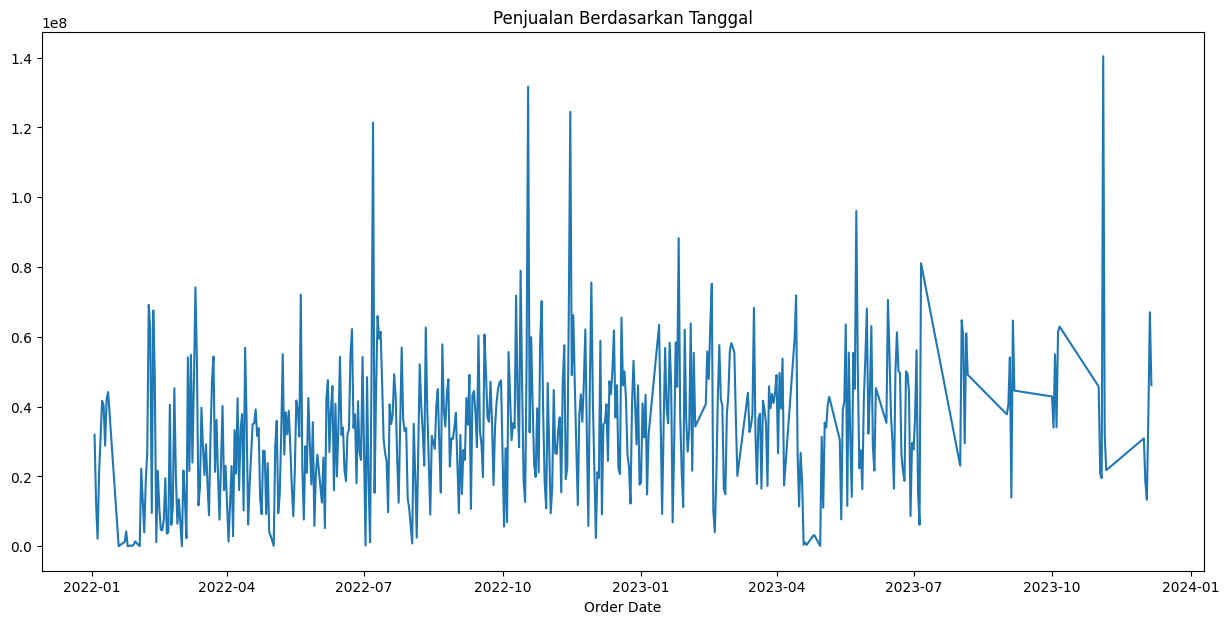

In [ ]:
# Mengonversi kolom 'Order Date' ke format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Mengelompokkan data berdasarkan tanggal dan menghitung total penjualan untuk setiap tanggal
sales_by_date = df.groupby(df['Order Date'].dt.date)["Sub Total"].sum()

sales_by_date_plot = sales_by_date.plot(figsize=(15, 7), title="Penjualan Berdasarkan Tanggal")
sales_by_date_plot

<Axes: title={'center': 'Penjualan Berdasarkan Bulan'}, xlabel='Order Date'>

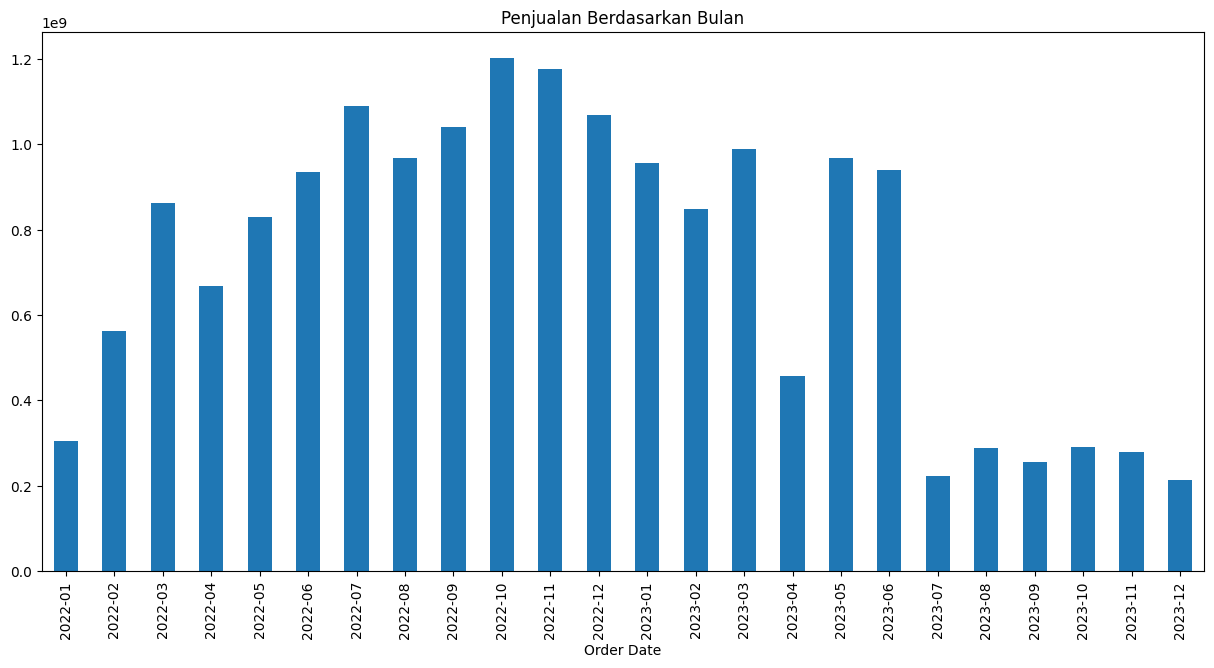

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan untuk setiap bulan
sales_by_month = df.groupby(df['Order Date'].dt.to_period("M"))["Sub Total"].sum()

sales_by_month_plot = sales_by_month.plot(kind='bar', figsize=(15, 7), title="Penjualan Berdasarkan Bulan")
sales_by_month_plot

<Axes: title={'center': 'Penjualan Tahun 2022 - 2023 (Januari - Juni)'}, xlabel='Order Date'>

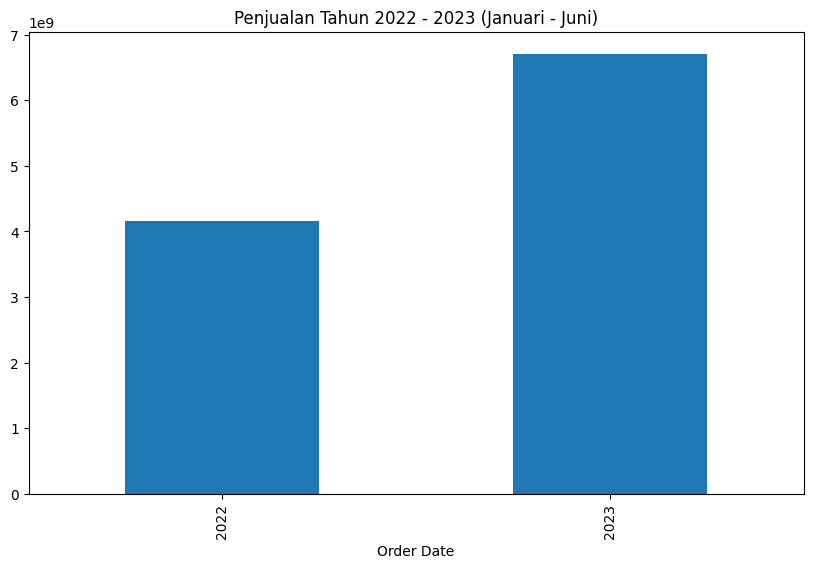

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung total penjualan untuk setiap tahun
sales_by_year = df.groupby(df['Order Date'].dt.year)["Sub Total"].sum()
# Memfilter data untuk tahun 2022 dari Januari hingga Juni
filtered_2022 = df[(df['Order Date'].dt.year == 2022) & (df['Order Date'].dt.month <= 6)]

# Menghitung total penjualan untuk tahun 2022 yang difilter
sales_2022_filtered = filtered_2022["Sub Total"].sum()

# Menggantikan nilai penjualan tahun 2022 dengan nilai yang telah difilter dalam series sales_by_year
sales_by_year[2022] = sales_2022_filtered

sales_by_year_plot_filtered = sales_by_year.plot(kind='bar', figsize=(10, 6), title="Penjualan Tahun 2022 - 2023 (Januari - Juni)")
sales_by_year_plot_filtered

In [ ]:
# Display the unique values for each column (showing the first 5 unique values for brevity)
unique_values_per_column = {col: df[col].unique()[:5] for col in df.columns}
unique_values_per_column

{'Unnamed: 0': array([0, 1, 2, 3, 9]),
 'Order Date': array(['30/06/2023 23:31 WIB', '30/06/2023 23:24 WIB',
        '30/06/2023 22:44 WIB', '30/06/2023 22:13 WIB',
        '30/06/2023 22:05 WIB'], dtype=object),
 'Channel': array(['Shopee', 'Tokopedia', 'Lazada', 'Blibli', 'Woocommerce'],
       dtype=object),
 'Store': array(['SP-Powertec', 'TP-Megajaya', 'SP-Megajaya', 'TP-Powertec',
        'LZ-Powertec'], dtype=object),
 'Sales Order ID': array(['SO-133433816', 'SO-133433690', 'SO-133432932', 'SO-133432239',
        'SO-133432071'], dtype=object),
 'Order Reference No.': array(['230701RG19MXN8', 'INV/20230630/MPL/3320394135', '230630RDE5VAJQ',
        'INV/20230630/MPL/3320319767', 'INV/20230630/MPL/3320309963'],
       dtype=object),
 'Payment Status': array(['Paid', 'Cancelled', 'Not Paid'], dtype=object),
 'Fulfillment Status': array(['Completed', 'Cancelled', 'Delivered', 'Shipped', 'Ready to Ship'],
       dtype=object),
 'Payment Type': array(['Online Payment', 'BCA Virtual 

In [ ]:
df.isnull().sum()

Unnamed: 0                         0
Order Date                         0
Channel                            0
Store                              0
Sales Order ID                     0
Order Reference No.                0
Payment Status                     0
Fulfillment Status                 0
Payment Type                    3789
Payment Date                     743
Shipping Label Printed Date    12771
Ready to Ship Date             22907
Shipped Date                   21013
Delivered Date                 28769
Completed Date                 43284
Cancelled Date                 43979
Shipping Courier                   0
Service Type                       0
AWB                                0
Customer Name                      0
Currency Code                      0
Item Name In Marketplace           0
Item Note                          0
Item Name in SAP                   0
Item Group                         0
Item Group Detail                  0
Brand                              0
S

In [ ]:
# Drop the "Order Note" column
df.drop(columns=["Order Note"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45126 entries, 0 to 45125
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   45126 non-null  int64         
 1   Order Date                   45126 non-null  object        
 2   Channel                      45126 non-null  object        
 3   Store                        45126 non-null  object        
 4   Sales Order ID               45126 non-null  object        
 5   Order Reference No.          45126 non-null  object        
 6   Payment Status               45126 non-null  object        
 7   Fulfillment Status           45126 non-null  object        
 8   Payment Type                 41337 non-null  object        
 9   Payment Date                 44383 non-null  datetime64[ns]
 10  Shipping Label Printed Date  32355 non-null  datetime64[ns]
 11  Ready to Ship Date           22219 non-nu

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]
num_duplicate_rows

0

In [ ]:
# Simpan ke file CSV
#df.to_csv('Mega Jaya x Narasio Data Clean.csv', index=False)

In [ ]:
# Mendapatkan nama-nama unique pada kolom Brand
unique_brands = df['Brand'].unique()

unique_brands

array(['Powertec', 'Elephant', 'Toyo', 'Crosby', 'Spanset', 'Vital',
       'Kondotec', 'Hitachi', 'RRT', 'TTC', 'Go Save', 'Mirai', 'NGK',
       'Kiswire', 'Endo', 'Roha', 'Legion'], dtype=object)

In [ ]:
# Menemukan nilai unik di kolom "Item Name In Marketplace"
unique_item_names_marketplace = df['Item Name In Marketplace'].unique()

# Menampilkan jumlah dan beberapa contoh nilai unik
num_unique_items_marketplace = len(unique_item_names_marketplace)
sample_unique_items_marketplace = unique_item_names_marketplace[:20]  # Menampilkan 10 contoh pertama

num_unique_items_marketplace, sample_unique_items_marketplace

(2692,
 array(['POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran - POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran',
        'Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang POWERTEC',
        'POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis - POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis',
        'Carabiner / Karabiner Galvanized - 4mm POWERTEC',
        'Webbing Sling Belt / Tali Angkat 3 Ton x 1 Meter POWERTEC Double Ply',
        'POWERTEC Tambang Nylon / Nilon 16mm x 200m Polypropylene PP Multi Rope - POWERTEC Tambang Nylon / Nilon 16mm x 200m Polypropylene PP Multi Rope',
        'Hand Winch / Katrol Manual 600lbs / 250Kg x 15 M Galv POWERTEC',
        'POWERTEC Carabiner / Karabiner Galvanized - 8mm  - POWERTEC Carabiner / Karabiner Galvanized - 8mm ',
        'POWERTEC Hand Winch / Katrol Manual 600lbs / 250Kg x 15 M Galv - POWERTEC Hand Winch / Katrol Manual 600lbs / 250Kg x 15 M Galv',
        'POWERTEC Hand Winc

In [ ]:
# Menampilkan semua nilai unik dari kolom "Item Name In Marketplace"
unique_item_names_marketplace.tolist()

['POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran - POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran',
 'Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang POWERTEC',
 'POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis - POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis',
 'Carabiner / Karabiner Galvanized - 4mm POWERTEC',
 'Webbing Sling Belt / Tali Angkat 3 Ton x 1 Meter POWERTEC Double Ply',
 'POWERTEC Tambang Nylon / Nilon 16mm x 200m Polypropylene PP Multi Rope - POWERTEC Tambang Nylon / Nilon 16mm x 200m Polypropylene PP Multi Rope',
 'Hand Winch / Katrol Manual 600lbs / 250Kg x 15 M Galv POWERTEC',
 'POWERTEC Carabiner / Karabiner Galvanized - 8mm  - POWERTEC Carabiner / Karabiner Galvanized - 8mm ',
 'POWERTEC Hand Winch / Katrol Manual 600lbs / 250Kg x 15 M Galv - POWERTEC Hand Winch / Katrol Manual 600lbs / 250Kg x 15 M Galv',
 'POWERTEC Hand Winch / Boat Winch / Katrol Manual 1200lbs / 540Kg Galv - POWERTEC Hand Winch / B

In [ ]:
# Membatasi jumlah item yang akan dianalisis untuk efisiensi komputasi (optional)
sample_data = unique_item_names_marketplace[:1000]  # Ambil 1000 item pertama sebagai contoh

# Menghitung vektor TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_data)

# Menjalankan algoritma K-means untuk pengelompokan
num_clusters = 50  # Jumlah kelompok yang diinginkan (ini bisa diubah sesuai kebutuhan)
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Mengelompokkan nama item berdasarkan hasil K-means
clustered_data = {}
for i, cluster in enumerate(clusters):
    if cluster not in clustered_data:
        clustered_data[cluster] = []
    clustered_data[cluster].append(sample_data[i])

# Menampilkan beberapa kelompok sebagai contoh
example_clusters = {k: clustered_data[k][:5] for k in list(clustered_data.keys())[:10]}
example_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{13: ['POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran - POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran',
  'Rantai SS 304 4mm Stainless Steel Chain POWERTEC - Meteran',
  'POWERTEC Rantai SS 304 3mm Stainless Steel Chain - Meteran - POWERTEC Rantai SS 304 3mm Stainless Steel Chain - Meteran',
  'Rantai SS 304 8mm Stainless Steel Chain POWERTEC - Meteran',
  'POWERTEC Rantai SS 304 4mm Stainless Steel Chain  - Meteran - POWERTEC Rantai SS 304 4mm Stainless Steel Chain  - Meteran'],
 0: ['Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang POWERTEC',
  'POWERTEC Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang - POWERTEC Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang',
  'Ratchet Tie Down Cargo Lashing Belt 2" x 8M Pengikat Barang POWERTEC',
  'POWERTEC Ratchet Tie Down Cargo Lashing Belt 2" x 8M Pengikat Barang - POWERTEC Ratchet Tie Down Cargo Lashing Belt 2" x 8M Pengikat Barang',
  'POWERTEC Ratchet Tie Down Cargo Lashing Belt

In [ ]:
# Membuat dictionary untuk menyimpan item yang digabungkan berdasarkan kata kunci
grouped_items = {'POWERTEC': [], 'Chain Block': []}

# Loop melalui setiap nama item dan mengelompokkannya berdasarkan kata kunci
for item_name in sample_data:
    if 'POWERTEC' in item_name:
        grouped_items['POWERTEC'].append(item_name)
    if 'Chain Block' in item_name:
        grouped_items['Chain Block'].append(item_name)

# Menampilkan jumlah dan beberapa contoh item untuk setiap kelompok
grouped_items_summary = {key: {'count': len(grouped_items[key]), 'examples': grouped_items[key][:5]} for key in grouped_items}
grouped_items_summary

{'POWERTEC': {'count': 899,
  'examples': ['POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran - POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran',
   'Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang POWERTEC',
   'POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis - POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis',
   'Carabiner / Karabiner Galvanized - 4mm POWERTEC',
   'Webbing Sling Belt / Tali Angkat 3 Ton x 1 Meter POWERTEC Double Ply']},
 'Chain Block': {'count': 44,
  'examples': ['Chain Block / Takel 0.5 Ton x 2.5 Meter ELEPHANT',
   'Chain Block / Takel 3 Ton x 5 Meter POWERTEC',
   'Chain Block / Takel 3 Ton x 10 Meter POWERTEC',
   'TOYO Chain Block / Takel 3 Ton x 5 Meter - TOYO Chain Block / Takel 3 Ton x 5 Meter',
   'Chain Block / Takel 1 Ton x 10 Meter POWERTEC']}}

In [ ]:
import re

# Fungsi untuk mendapatkan merk dari nama item
def get_brand(item_name):
    # Menggunakan regex untuk memisahkan kata-kata di awal string sebelum spasi pertama
    match = re.match(r"([\w\s]+)\s", item_name)
    if match:
        return match.group(1)
    return None

# Mengumpulkan semua merk dari nama item
brands = [get_brand(item_name) for item_name in sample_data if get_brand(item_name) is not None]

# Menghitung frekuensi masing-masing merk
from collections import Counter
brand_counts = Counter(brands)

# Menampilkan merk yang paling sering muncul
common_brands = brand_counts.most_common(10)
common_brands

[('Webbing Sling Belt', 56),
 ('Wire Rope', 54),
 ('POWERTEC Wire Rope', 48),
 ('Carabiner', 40),
 ('Turnbuckle', 38),
 ('POWERTEC Carabiner', 35),
 ('Wire Rope Clip', 35),
 ('Chain Block', 33),
 ('POWERTEC Wire Rope Clip', 31),
 ('POWERTEC Webbing Sling Belt', 27)]

In [ ]:
# Membuat dictionary untuk menyimpan item yang digabungkan berdasarkan merk atau kata kunci yang umum
grouped_by_common_brands = {brand: [] for brand, _ in common_brands}
grouped_by_common_brands['POWERTEC'] = []  # Menambahkan 'POWERTEC' sebagai merk khusus

# Loop melalui setiap nama item dan mengelompokkannya berdasarkan merk atau kata kunci yang umum
for item_name in sample_data:
    for brand in grouped_by_common_brands.keys():
        if item_name.startswith(brand):
            grouped_by_common_brands[brand].append(item_name)

for item_name in sample_data:
    if item_name.startswith('POWERTEC'):
        grouped_by_common_brands['POWERTEC'].append(item_name)

# Menampilkan jumlah dan beberapa contoh item untuk setiap kelompok
grouped_by_common_brands_summary = {key: {'count': len(grouped_by_common_brands[key]), 'examples': grouped_by_common_brands[key][:5]} for key in grouped_by_common_brands}
grouped_by_common_brands_summary

{'Webbing Sling Belt': {'count': 56,
  'examples': ['Webbing Sling Belt / Tali Angkat 3 Ton x 1 Meter POWERTEC Double Ply',
   'Webbing Sling Belt / Tali Angkat 2 Ton x 6 Meter POWERTEC Double Ply',
   'Webbing Sling Belt / Tali Angkat 1 Ton x 1 Meter POWERTEC Double Ply',
   'Webbing Sling Belt / Tali Angkat 5 Ton x 4 Meter POWERTEC Double Ply',
   'Webbing Sling Belt / Tali Angkat 2 Ton x 2 Meter POWERTEC Double Ply']},
 'Wire Rope': {'count': 91,
  'examples': ['Wire Rope Clip / Klem Seling Kuku Macan Galv 3mm - 1/8" POWERTEC',
   'Wire Rope / Kawat Seling Baja 6x12 7FC PVC 3-5mm POWERTEC - 1 Meter',
   'Wire Rope / Kawat Seling Baja 6x12 7FC 5mm Galv POWERTEC - 1 Meter',
   'Wire Rope Clip / Klem Seling Kuku Macan Galv 5mm - 3/16" POWERTEC',
   'Wire Rope Clip / Klem Seling Kuku Macan Galv 10mm - 3/8" POWERTEC']},
 'POWERTEC Wire Rope': {'count': 79,
  'examples': ['POWERTEC Wire Rope Clip / Klem Seling Kuku Macan Galv 5mm - 3/16" - POWERTEC Wire Rope Clip / Klem Seling Kuku Macan 

In [ ]:
# Menampilkan statistik dasar dan beberapa contoh unik dari kolom "Item Name In Marketplace"
unique_item_names_marketplace_stats = {
    'count': len(unique_item_names_marketplace),
    'examples': unique_item_names_marketplace[:5]  # Menampilkan 5 contoh pertama
}

unique_item_names_marketplace_stats

{'count': 2692,
 'examples': array(['POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran - POWERTEC Rantai SS 304 5mm Stainless Steel Chain  - Meteran',
        'Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang POWERTEC',
        'POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis - POWERTEC Shackle D Galvanized 16mm - 5/8" Segel Dee Galvanis',
        'Carabiner / Karabiner Galvanized - 4mm POWERTEC',
        'Webbing Sling Belt / Tali Angkat 3 Ton x 1 Meter POWERTEC Double Ply'],
       dtype=object)}

# Analisa Total Sales pada Item Name in Marketplace

In [ ]:
# Normalize the item names: lowercase and strip whitespace
df['Normalized Item Name'] = df['Item Name In Marketplace'].str.lower().str.strip()

# Remove common words or phrases that might be redundant for identification
words_to_remove = ['powertec', '-']
for word in words_to_remove:
    df['Normalized Item Name'] = df['Normalized Item Name'].str.replace(word, '')

# Now, let's group by the normalized item name and calculate the sales
grouped_sales = df.groupby('Normalized Item Name')['Total'].sum().reset_index()
sorted_sales = grouped_sales.sort_values(by='Total', ascending=False)

sorted_sales.head(10)

,Normalized Item Name,Total
1284,hydraulic hand pallet truck trolley 3 ton / 30...,316564220
1582,"ratchet tie down cargo lashing belt 2"" x 8m pe...",284194075
1571,"ratchet tie down cargo lashing belt 2"" x 10m p...",243340915
2359,webbing sling belt / tali angkat 5 ton x 6 met...,201382416
1566,"ratchet tie down cargo lashing belt 1"" x 5m pe...",163309555
1407,mini electric hoist / katrol listrik 600/1200 ...,151184600
1022,chain block / takel 1 ton x 5 meter toyo,146457110
1089,chain block / takel 5 ton x 5 meter toyo,134049780
1406,mini electric hoist / katrol listrik 300/600 k...,129906550
2062,toyo hydraulic hand pallet truck trolley 3 ton...,123013395


In [ ]:
# Extract the first two words as the prefix for grouping
df['Item'] = df['Normalized Item Name'].str.split().str[:2].str.join(' ')

# Group by the item prefix and calculate the sales
grouped_sales_by_prefix = df.groupby('Item')['Total'].sum().reset_index()
sorted_sales_by_prefix = grouped_sales_by_prefix.sort_values(by='Total', ascending=False)

# Display the top 10 grouped items with an enumerated list format
top_10_grouped_items = sorted_sales_by_prefix.head(10)

enumerated_list = [(index+1, row['Item'], row['Total']) for index, row in top_10_grouped_items.iterrows()]
# Format the output with correct enumeration
formatted_list = [(index+1, item[1], item[2]) for index, item in enumerate(enumerated_list)]

In [ ]:
# Group the data by "Item Name In Marketplace" and sum the "Total" for each item
item_sales_grouped = df.groupby('Item Name In Marketplace')['Total'].sum().reset_index()

# Sort the items by total sales in descending order
item_sales_grouped_sorted = item_sales_grouped.sort_values(by='Total', ascending=False)

# Extract unique item names and their sales
unique_item_names_marketplace = item_sales_grouped_sorted['Item Name In Marketplace'].unique()

# Display statistics and some unique examples from "Item Name In Marketplace"
unique_item_names_marketplace_stats = {
    'count': len(unique_item_names_marketplace),
    'examples': unique_item_names_marketplace[:5]  # Displaying the first 5 examples
}

unique_item_names_marketplace_stats

{'count': 2692,
 'examples': array(['Hydraulic Hand Pallet Truck Trolley 3 Ton / 3000 Kg TOYO',
        'Ratchet Tie Down Cargo Lashing Belt 2" x 8M Pengikat Barang POWERTEC',
        'Ratchet Tie Down Cargo Lashing Belt 2" x 10M Pengikat Barang POWERTEC',
        'Webbing Sling Belt / Tali Angkat 5 Ton x 6 Meter POWERTEC Double Ply',
        'Ratchet Tie Down Cargo Lashing Belt 1" x 5M Pengikat Barang POWERTEC'],
       dtype=object)}

In [ ]:
# Convert the formatted list into a DataFrame for table representation
table_df = pd.DataFrame(formatted_list, columns=['No','Item', 'Total Sales (IDR)'])
table_df = table_df.drop(columns=['No'])
table_df

,Item,Total Sales (IDR)
0,webbing sling,3242623951
1,wire rope,2746616768
2,chain block,2348453300
3,ratchet tie,1292367898
4,bow shackle,1200648280
5,hand winch,988128481
6,carabiner /,702386239
7,load chain,677298353
8,tali tambang,653836053
9,mini electric,622910900


In [ ]:
table_df.style.format({'Total Sales (IDR)': '{:,.0f}'})

,Item,Total Sales (IDR)
0,webbing sling,"3,242,623,951"
1,wire rope,"2,746,616,768"
2,chain block,"2,348,453,300"
3,ratchet tie,"1,292,367,898"
4,bow shackle,"1,200,648,280"
5,hand winch,"988,128,481"
6,carabiner /,"702,386,239"
7,load chain,"677,298,353"
8,tali tambang,"653,836,053"
9,mini electric,"622,910,900"


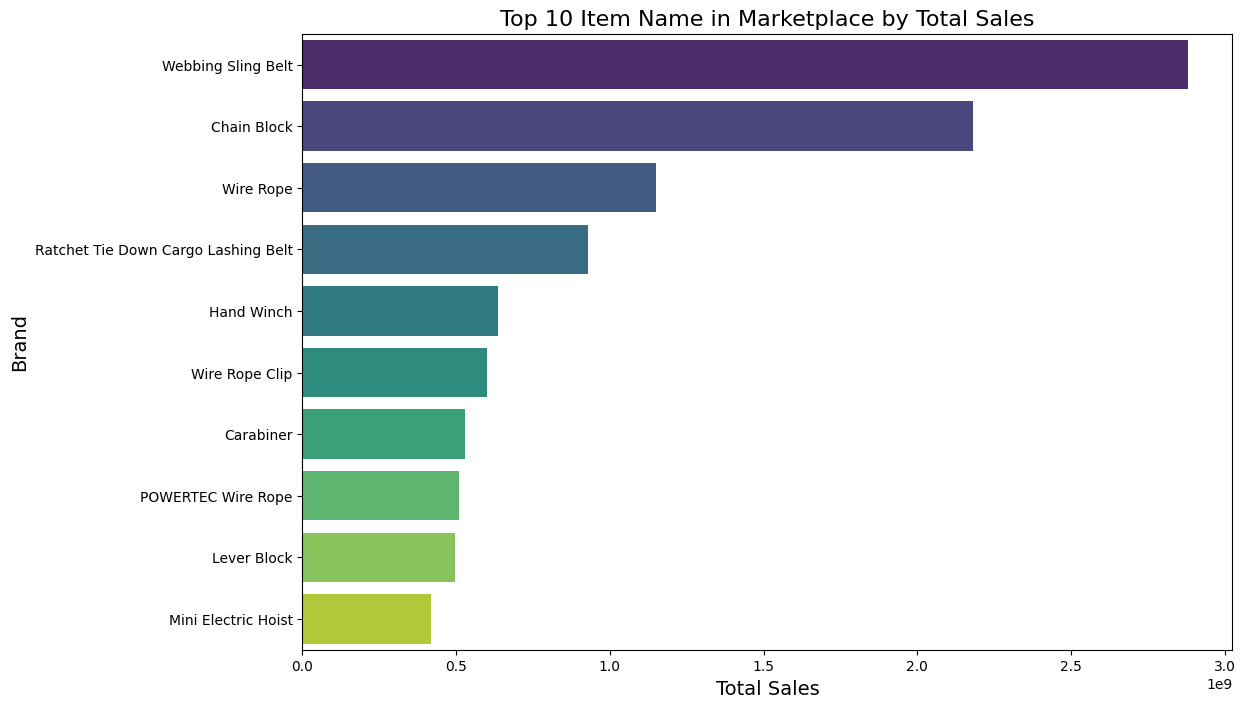

In [ ]:
# Mendefinisikan kembali fungsi untuk mendapatkan merk dari nama item
def get_brand_prefix(item_name):
    match = re.match(r"([\w\s]+)\s", item_name)
    if match:
        return match.group(1)
    return None

# Mengaplikasikan fungsi untuk mendapatkan merk dari nama item
df['Brand_Prefix'] = df['Item Name In Marketplace'].apply(lambda x: get_brand_prefix(x) if get_brand_prefix(x) is not None else 'Unknown')

# Mengelompokkan data berdasarkan "Brand_Prefix" dan menghitung total penjualan ("Total") untuk setiap merk
grouped_by_brand = df.groupby('Brand_Prefix')['Total'].sum().reset_index()

# Mengurutkan data berdasarkan "Total" dari yang paling tinggi ke yang paling rendah, dan memilih 10 merk dengan total penjualan tertinggi
top_10_sales_by_brand = grouped_by_brand.sort_values('Total', ascending=False).reset_index(drop=True).head(10)

# Membuat plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Brand_Prefix', data=top_10_sales_by_brand, palette='viridis')

# Menambahkan judul dan label
plt.title('Top 10 Item Name in Marketplace by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Menampilkan plot
plt.show()

# Analisa Top 10 Brand by Sales Revenue

In [ ]:
# Perform the aggregation to find the Top 10 Brands by Sales Revenue
# Calculating the Sales Revenue as 'Quantity' multiplied by 'Total'
df['Sales Revenue'] = df['Quantity'] * df['Total']

# Aggregate the data by 'Brand' to find the total Sales Revenue for each brand
top_brands = df.groupby('Brand')['Sales Revenue'].sum().reset_index()

# Sort the brands by Sales Revenue in descending order and pick the top 10
top_brands = top_brands.sort_values('Sales Revenue', ascending=False).head(10)
top_brands = top_brands[['Brand', 'Sales Revenue']].reset_index(drop=True)
top_brands

,Brand,Sales Revenue
0,Powertec,769915764548
1,Toyo,6305109944
2,Spanset,1707028395
3,Crosby,1358510618
4,Kondotec,353687010
5,Kiswire,252636060
6,Vital,97977420
7,Elephant,85366820
8,Mirai,72656100
9,Go Save,25907090


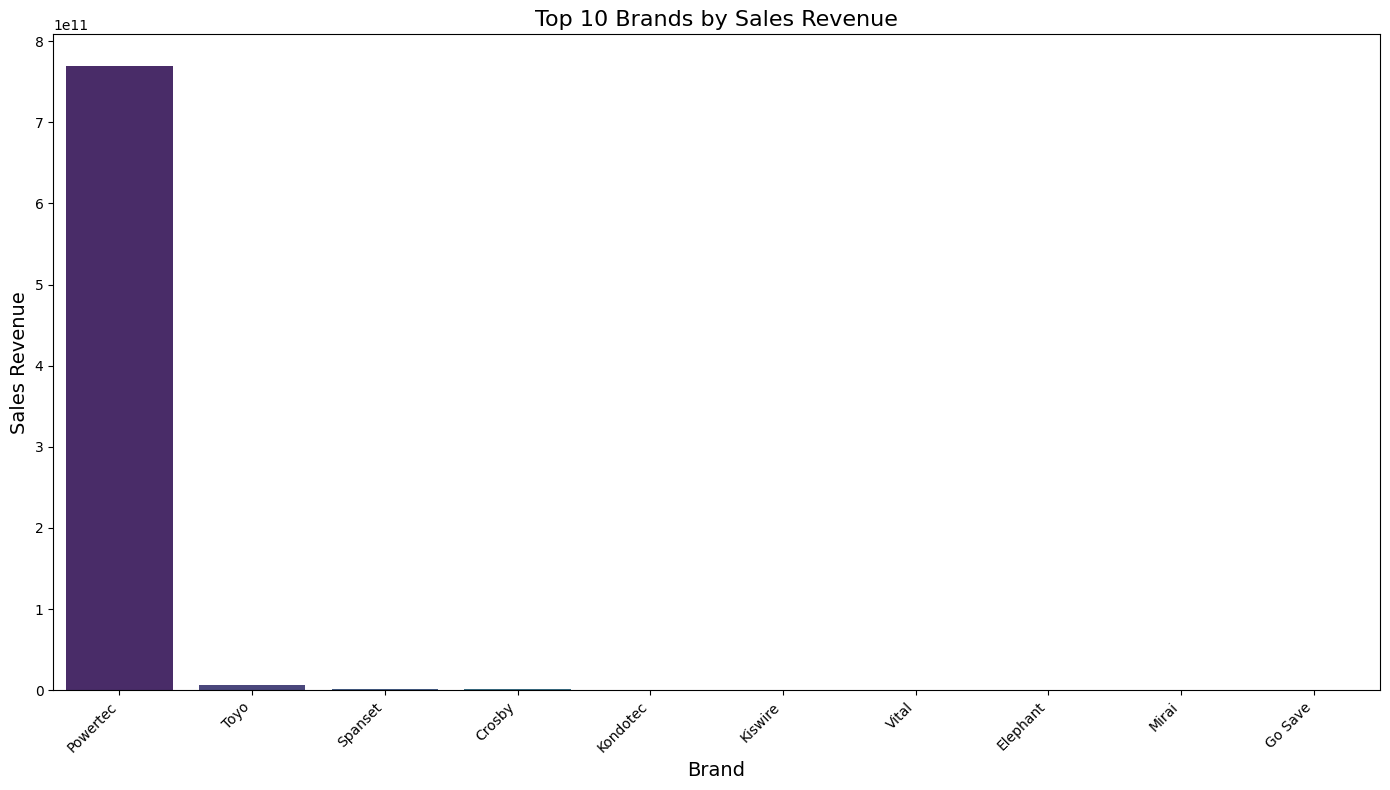

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the barplot
sns.barplot(data=top_brands, x='Brand', y='Sales Revenue', palette='viridis')

# Add labels and title
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Sales Revenue', fontsize=14)
plt.title('Top 10 Brands by Sales Revenue', fontsize=16)

# Rotate the x labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

- Brand dengan pendapatan tertinggi mungkin tidak selalu merupakan brand dengan jumlah penjualan produk terbanyak. Ini bisa disebabkan oleh perbedaan harga produk antar brand.
- Ada beberapa brand dengan pendapatan yang tinggi tetapi dengan jumlah penjualan produk yang relatif lebih rendah, menunjukkan bahwa mereka mungkin menjual produk dengan harga yang lebih tinggi.

# Penggunaan Voucher yang digunakan oleh Customers

In [ ]:
voucher_usage = df.groupby('Voucher Seller').agg({
    'Sales Order ID': 'count',
    'Sub Total': 'sum'
}).reset_index().sort_values(by='Sales Order ID', ascending=False)

# Rename kolom untuk keterbacaan yang lebih baik
voucher_usage.rename(columns={'Sales Order ID': 'Number of Orders', 'Sub Total': 'Total Revenue'}, inplace=True)

voucher_usage

,Voucher Seller,Number of Orders,Total Revenue
0,0,38501,15637467360
5,5000,2997,376047656
2,1000,1349,146596829
3,3000,915,70329427
6,7000,733,259753080
9,20000,319,630232259
7,10000,134,69518311
8,15000,123,101399806
10,30000,52,130057702
1,808,1,64600


In [ ]:
# Sort data berdasarkan 'Voucher Seller' untuk tampilan yang lebih baik
df_voucher = voucher_usage
df_voucher = df_voucher.sort_values('Voucher Seller')

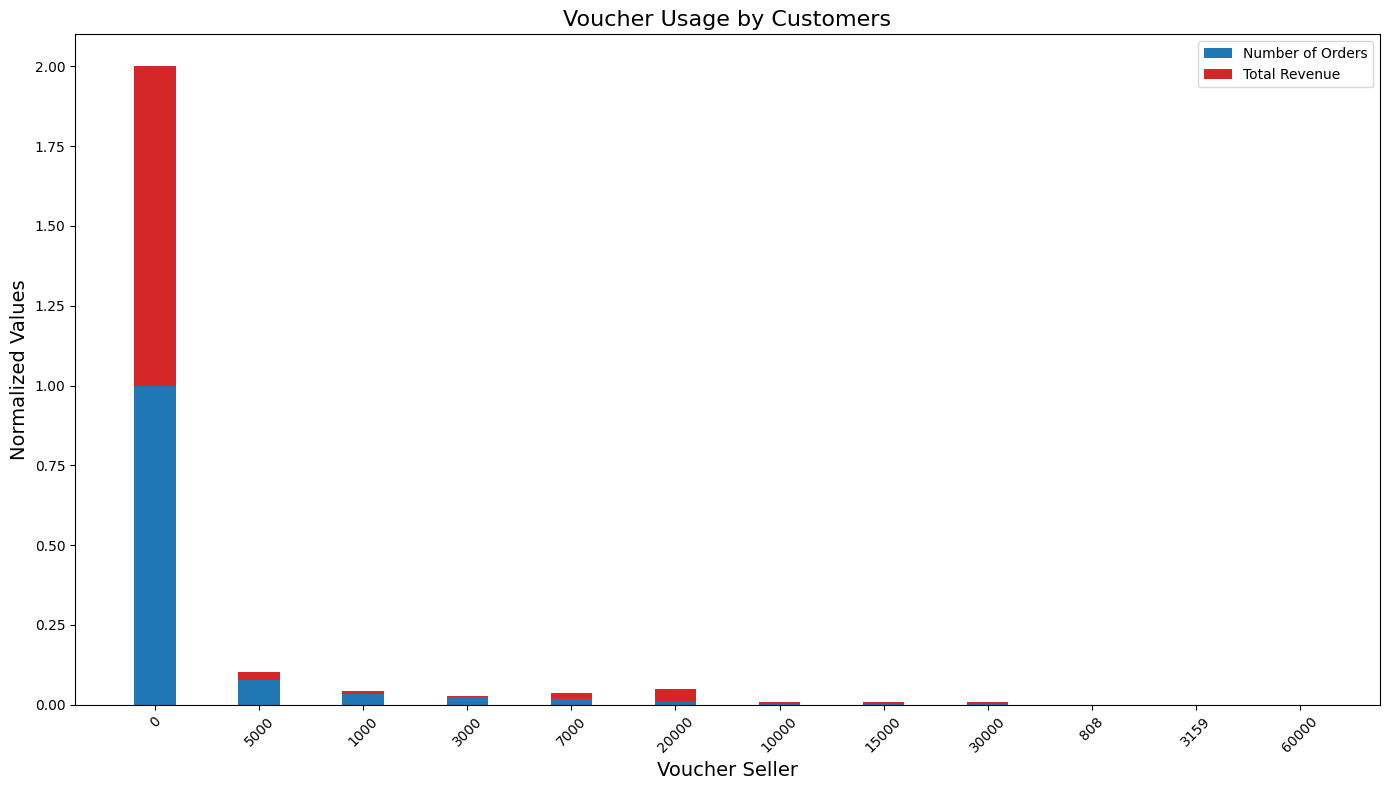

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 8))

# Width of the bars
width = 0.4

# Calculate normalized values for better comparison in stacked bar chart
# We use MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
voucher_usage_normalized = pd.DataFrame(scaler.fit_transform(voucher_usage[['Number of Orders', 'Total Revenue']]),
                                        columns=['Number of Orders', 'Total Revenue'])

# The x position for the bars
x = range(len(voucher_usage))

# Create the stacked bar chart
ax.bar(x, voucher_usage_normalized['Number of Orders'], width, label='Number of Orders', color='tab:blue')
ax.bar(x, voucher_usage_normalized['Total Revenue'], width, bottom=voucher_usage_normalized['Number of Orders'], label='Total Revenue', color='tab:red')

# Labels and title
ax.set_xlabel('Voucher Seller', fontsize=14)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(voucher_usage['Voucher Seller'], rotation=45)
ax.legend()

plt.title('Voucher Usage by Customers', fontsize=16)
plt.tight_layout()
plt.show()

Dari tabel di atas, kita dapat melihat distribusi penggunaan voucher oleh pelanggan dan pendapatan yang terkait:

- Kolom "Voucher Seller" menunjukkan nominal voucher yang diberikan oleh penjual.
- Kolom "Number of Orders" menunjukkan berapa kali voucher tersebut digunakan dalam pembelian.
- Kolom "Total Revenue" menunjukkan total pendapatan dari pesanan yang menggunakan voucher tertentu.

Beberapa poin menarik:

1. Sebagian besar pesanan (38,501 pesanan) tidak menggunakan voucher sama sekali, dengan total pendapatan sekitar 15,6 miliar.
2. Voucher dengan nominal 5000 digunakan paling banyak (2,997 kali) setelah pesanan tanpa voucher, dengan total pendapatan sekitar 376 juta.

Beberapa poin menarik:

- Meskipun sebagian besar pesanan tidak menggunakan voucher (seperti ditunjukkan oleh poin di sebelah kiri), penggunaan voucher dengan nominal lebih tinggi cenderung menghasilkan pendapatan yang lebih besar. Ini bisa disebabkan oleh pelanggan yang memutuskan untuk membeli lebih banyak atau produk dengan harga lebih tinggi ketika menggunakan voucher dengan nominal lebih besar.
- Voucher dengan nominal 5000 tampaknya sangat populer, tetapi tidak menghasilkan pendapatan sebanding dengan popularitasnya. Ini mungkin menunjukkan bahwa voucher ini sering digunakan untuk pembelian dengan nilai yang lebih rendah.

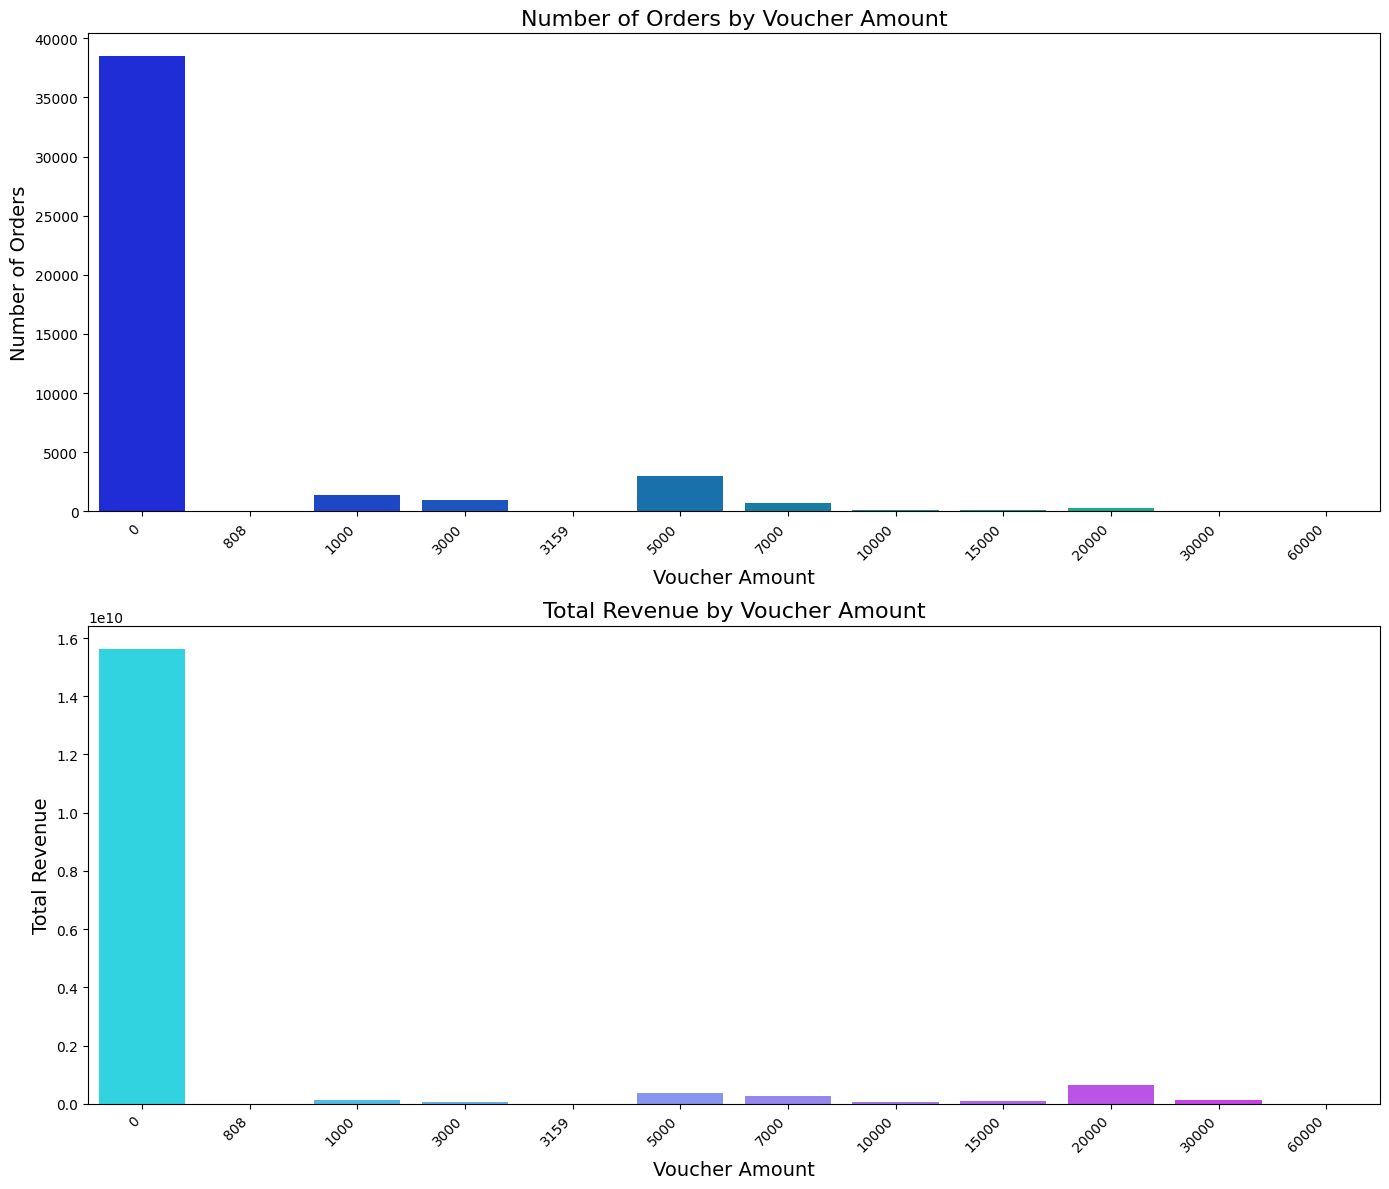

In [ ]:
# Membuat visualisasi yang membandingkan penggunaan voucher dan pendapatannya

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Barplot untuk jumlah pesanan berdasarkan voucher
sns.barplot(data=voucher_usage, x='Voucher Seller', y='Number of Orders', ax=ax1, palette='winter')
ax1.set_title('Number of Orders by Voucher Amount', fontsize=16)
ax1.set_xlabel('Voucher Amount', fontsize=14)
ax1.set_ylabel('Number of Orders', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Barplot untuk pendapatan berdasarkan voucher
sns.barplot(data=voucher_usage, x='Voucher Seller', y='Total Revenue', ax=ax2, palette='cool')
ax2.set_title('Total Revenue by Voucher Amount', fontsize=16)
ax2.set_xlabel('Voucher Amount', fontsize=14)
ax2.set_ylabel('Total Revenue', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Dari visualisasi di atas, kita dapat melihat pengaruh voucher penjual terhadap jumlah pesanan dan pendapatan:

- **Grafik Atas**: Menunjukkan jumlah pesanan berdasarkan nominal voucher. Voucher dengan nominal 0 (tidak ada voucher) memiliki jumlah pesanan terbanyak, diikuti oleh voucher dengan nominal 5000.
- **Grafik Bawah**: Menunjukkan pendapatan total berdasarkan nominal voucher. Meskipun voucher dengan nominal 0 memiliki jumlah pesanan terbanyak, voucher dengan nominal yang lebih tinggi seperti 20,000 dan 30,000 menghasilkan pendapatan yang signifikan walaupun jumlah pesanannya lebih sedikit.

Dari kedua grafik ini, kita dapat melihat bagaimana voucher penjual mempengaruhi perilaku pembelian dan pendapatan.

# Distribusi Penjualan Berdasarkan Lokasi

In [ ]:
# Menghitung jumlah pesanan berdasarkan provinsi
province_sales = df.groupby('Shipping Province').agg({
    'Sales Order ID': 'count'
}).reset_index().sort_values(by='Sales Order ID', ascending=False)

# Menampilkan distribusi penjualan berdasarkan provinsi
province_sales

,Shipping Province,Sales Order ID
8,Jawa Barat,12658
5,D.K.I. Jakarta,10154
2,Banten,5243
10,Jawa Timur,4595
9,Jawa Tengah,3504
1,Bali,1013
32,Sumatera Selatan,986
4,D.I. Yogyakarta,876
33,Sumatera Utara,760
18,Lampung,629


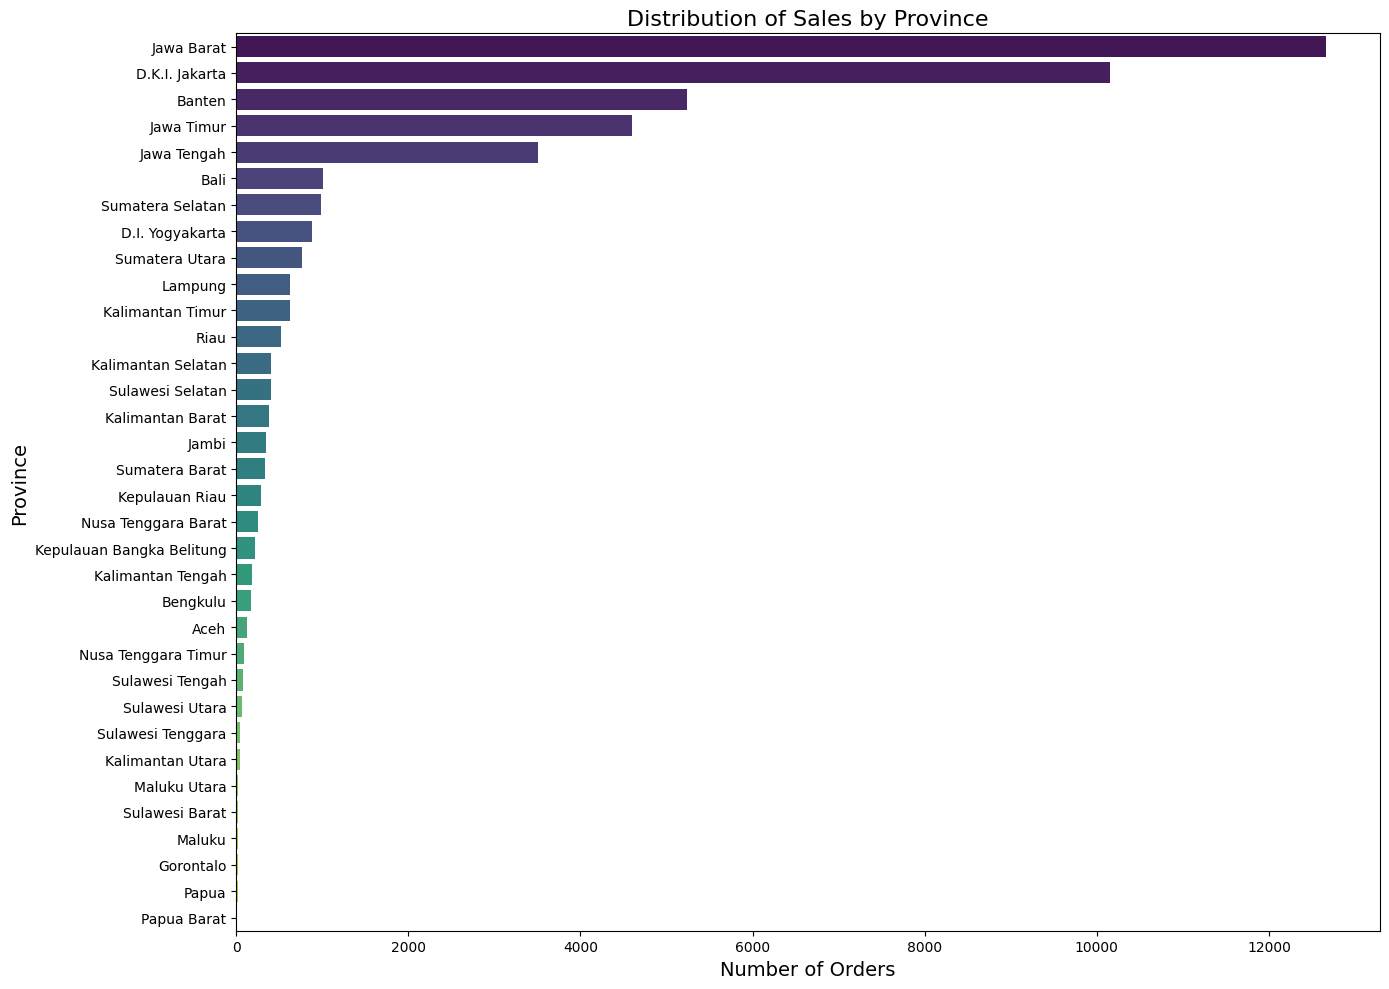

In [ ]:
# Membuat visualisasi distribusi penjualan berdasarkan provinsi dengan diagram batang

plt.figure(figsize=(14, 10))
sns.barplot(data=province_sales, y='Shipping Province', x='Sales Order ID', palette='viridis')
plt.title('Distribution of Sales by Province', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.tight_layout()
plt.show()

# Trend revenue megajaya 2022 - 23 compare Year on Year

In [ ]:
# Extract the year from the "Order Date" column
df['Year'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.year

# Calculate the total revenue for each year using the "Total" column
revenue_by_year = df.groupby('Year')['Total'].sum()

# Filter the revenue data for the years 2022 and 2023
revenue_2022_2023 = revenue_by_year[revenue_by_year.index.isin([2022, 2023])]
revenue_2022_2023

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Year
2022    13286697844
2023     8393394299
Name: Total, dtype: int64

In [ ]:
# Calculate the Year-on-Year (YoY) percentage change in revenue
yoy_change = (revenue_2022_2023.pct_change() * 100).dropna()

yoy_change_percentage = yoy_change.iloc[0]
yoy_change_percentage

-36.828590538090054

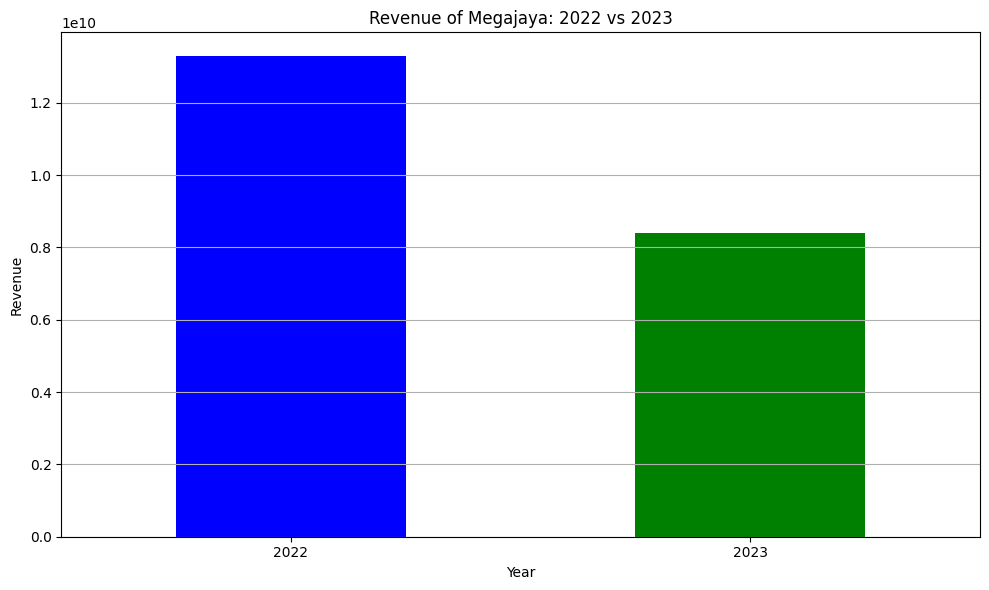

In [ ]:
# Plotting the revenue data
plt.figure(figsize=(10, 6))
revenue_2022_2023.plot(kind='bar', color=['blue', 'green'])
plt.title('Revenue of Megajaya: 2022 vs 2023')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

Grafik batang tersebut menggambarkan pendapatan toko "Megajaya" selama dua tahun berturut-turut, yaitu 2022 dan 2023.

1. **Tahun 2022**: Pada tahun ini, toko "Megajaya" mencapai puncak kinerjanya dengan pendapatan mencapai sekitar Rp 13,29 miliar.

2. **Tahun 2023**: Di tahun berikutnya, meskipun pendapatan masih cukup signifikan, toko "Megajaya" mengalami penurunan, mencatat hanya sekitar Rp 8,39 miliar.

**Kesimpulan**:
Grafik ini menunjukkan adanya penurunan pendapatan sekitar 36,83% dari tahun 2022 ke 2023. Penurunan sebesar ini tentunya memerlukan perhatian, dan bisa jadi disebabkan oleh berbagai faktor. Faktor-faktor tersebut bisa meliputi perubahan strategi pemasaran, persaingan yang lebih ketat di pasar, perubahan preferensi konsumen, atau dampak eksternal seperti kondisi ekonomi atau krisis global. Untuk memahami alasan sebenarnya di balik penurunan ini, diperlukan analisis yang lebih mendalam dengan melibatkan data lain dan memeriksa berbagai aspek bisnis.

# Trend Revenue Mega Jaya Januari - Juni 2022 & 2023

In [ ]:
# Extract the month from the "Order Date" column
df['Month'] = pd.to_datetime(df['Order Date'], errors='coerce').dt.month

# Filter the data for transactions from January to June for the years 2022 and 2023
filtered_data = df[(df['Month'].between(1, 6)) & (df['Year'].isin([2022, 2023]))]

# Calculate the total revenue for each month in the years 2022 and 2023
revenue_by_month = filtered_data.groupby(['Year', 'Month'])['Total'].sum()

revenue_by_month

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Year  Month
2022  1         397128868
      2         739444612
      3        1034177307
      4         828312321
      5        1014796529
      6        1140363116
2023  1        1162071754
      2        1110009336
      3        1255149159
      4         586632333
      5        1208580662
      6        1195744765
Name: Total, dtype: int64

In [ ]:
# Calculate the total revenue for January to June for the years 2022 and 2023
total_revenue_jan_to_june = revenue_by_month.groupby('Year').sum()

# Calculate the Year-on-Year (YoY) percentage change in revenue for January to June
yoy_change_jan_to_june = (total_revenue_jan_to_june.pct_change() * 100).dropna()

total_revenue_jan_to_june, yoy_change_jan_to_june.iloc[0]

(Year
 2022    5154222753
 2023    6518188009
 Name: Total, dtype: int64,
 26.463063809302923)

In [ ]:
# Calculate the Year-on-Year (YoY) percentage change in revenue for January to June
yoy_change_jan_to_june_percentage = (total_revenue_jan_to_june.pct_change() * 100).dropna()

yoy_change_jan_to_june_value = yoy_change_jan_to_june_percentage.iloc[0]
yoy_change_jan_to_june_value

26.463063809302923

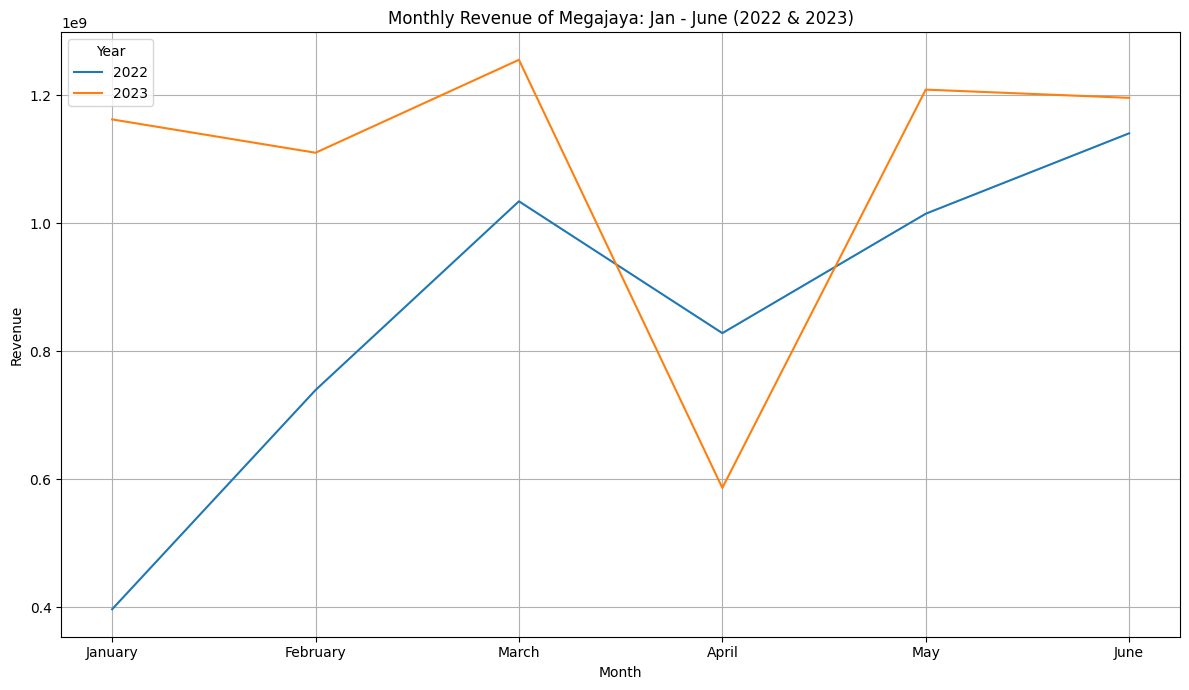

In [ ]:
# Plotting the monthly revenue data as a line chart
plt.figure(figsize=(12, 7))
revenue_by_month.unstack(level=0).plot(ax=plt.gca())
plt.title('Monthly Revenue of Megajaya: Jan - June (2022 & 2023)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(range(1, 7), ['January', 'February', 'March', 'April', 'May', 'June'])
plt.legend(title='Year')

# Display the plot
plt.tight_layout()
plt.show()

# Total Revenue Mega Jaya

In [ ]:
# Calculate the total revenue for "Megajaya" across all available data
total_revenue_megajaya = df['Total'].sum()
total_revenue_megajaya

21680092143

# Trend Revenue Mega Jaya per Channelnya

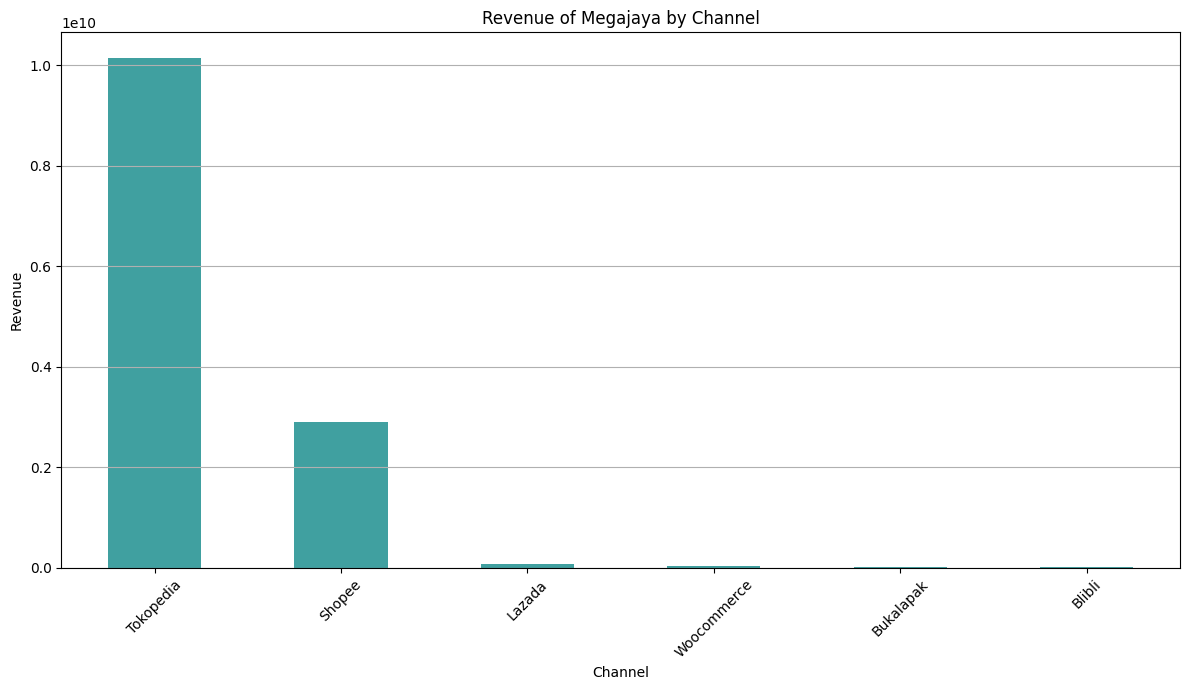

In [ ]:
# Filter the data for sales from "Megajaya" store only in the original df
df_megajaya = df[df['Store'].str.contains("Megajaya", case=False, na=False)]

# Calculate the total revenue for each channel for "Megajaya"
revenue_by_channel = df_megajaya.groupby('Channel')['Total'].sum().sort_values(ascending=False)

# Plotting the revenue data by channel
plt.figure(figsize=(12, 7))
revenue_by_channel.plot(kind='bar', color='teal', alpha=0.75)
plt.title('Revenue of Megajaya by Channel')
plt.xlabel('Channel')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

# compare trend revenue mega jaya per channelnya

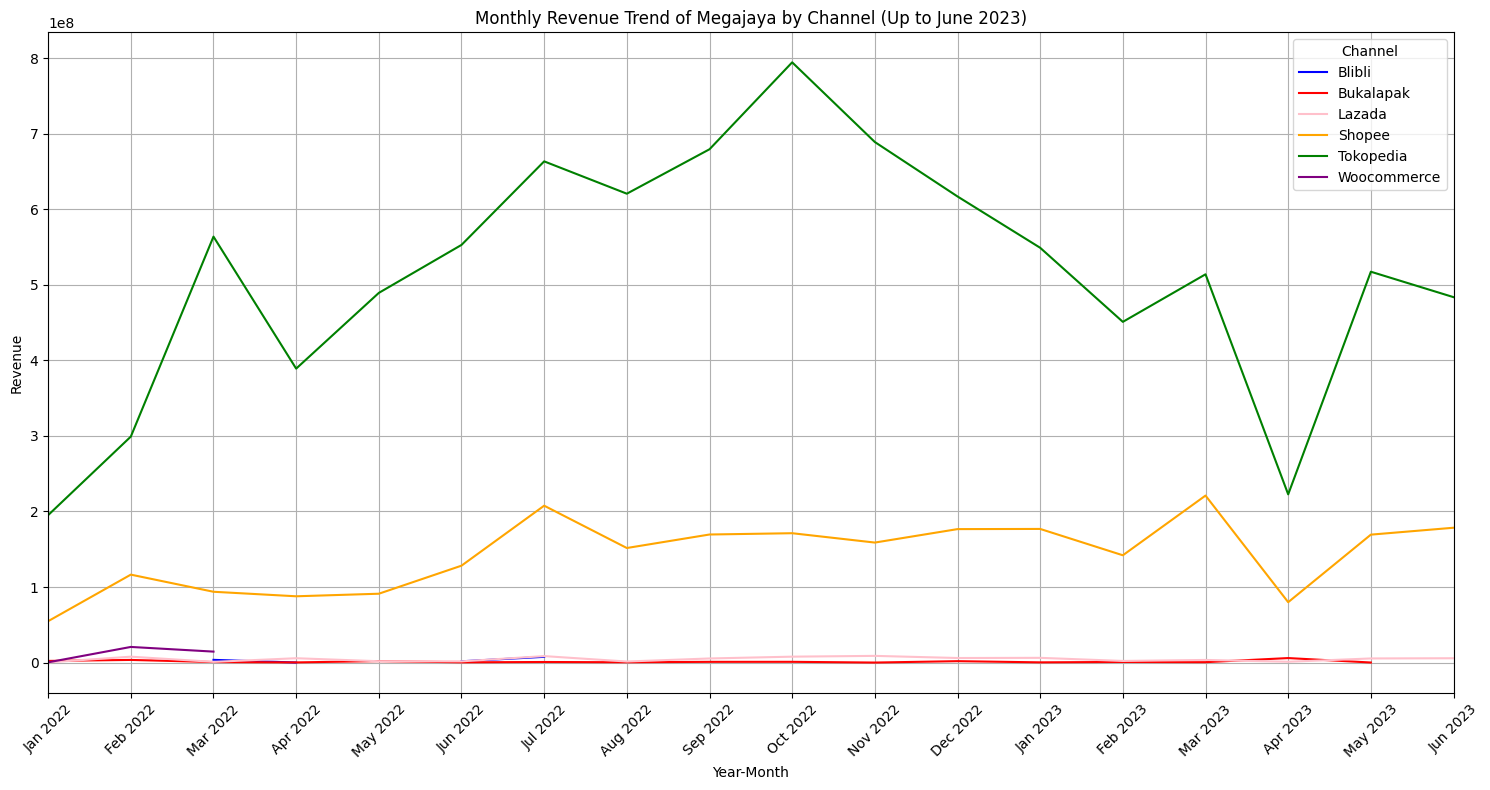

In [ ]:
# Filter the revenue data to only include data up to June 2023
revenue_by_channel_monthly_filtered = revenue_by_channel_monthly[revenue_by_channel_monthly.index <= '2023-06']

# Define the color mapping for each channel
channel_colors = {
    'Shopee': 'orange',
    'Tokopedia': 'green',
    'Lazada': 'pink',
    'Bukalapak': 'red',
    'Blibli': 'blue',
    'Woocommerce': 'purple'
}

# Plotting the trend of revenue per channel up to June 2023 with the specified colors
fig, ax = plt.subplots(figsize=(15, 8))

revenue_by_channel_monthly_filtered.plot(ax=ax, color=[channel_colors[channel] for channel in revenue_by_channel_monthly_filtered.columns])
ax.set_title('Monthly Revenue Trend of Megajaya by Channel (Up to June 2023)')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Revenue')
ax.grid(True)
ax.legend(title='Channel')
ax.set_xticks(revenue_by_channel_monthly_filtered.index)
ax.set_xticklabels(revenue_by_channel_monthly_filtered.index.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

#top 10 kategori yg nyumbang revenue paling besar

In [ ]:
# Calculate the total revenue for each item group for "Megajaya"
revenue_by_item_group = df_megajaya.groupby('Item Group')['Total'].sum().sort_values(ascending=False)

# Get the top 10 item groups contributing the most revenue
top_10_item_groups = revenue_by_item_group.head(10)
top_10_item_groups

Item Group
Rigging Hardware     3604902356
Hoist                2539891782
Sling Belt           1950795253
Wire Rope            1170393267
Rope                  715456336
Winch                 697067025
Chain                 659323794
Load Restraint        539531825
Material Handling     432850455
Girder Trolley        263898580
Name: Total, dtype: int64

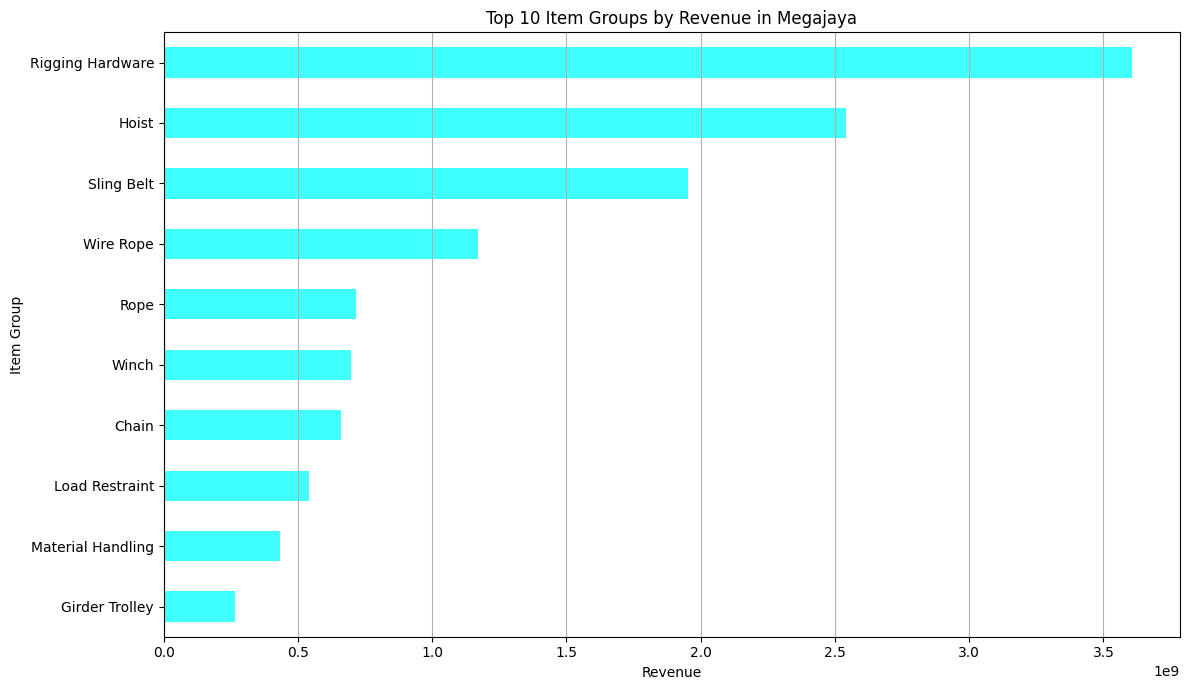

In [ ]:
# Plotting the top 10 item groups contributing the most revenue
plt.figure(figsize=(12, 7))
top_10_item_groups.sort_values().plot(kind='barh', color='cyan', alpha=0.75)
plt.title('Top 10 Item Groups by Revenue in Megajaya')
plt.xlabel('Revenue')
plt.ylabel('Item Group')
plt.grid(axis='x')

# Display the plot
plt.tight_layout()
plt.show()

**Interpretasi**:
- **Rigging Hardware**: Berada di puncak daftar dengan pendapatan tertinggi, menunjukkan bahwa produk dalam grup ini sangat diminati oleh pelanggan dan menjadi salah satu sumber pendapatan utama toko.
- **Hoist** dan **Sling Belt**: Kedua grup ini juga memiliki pendapatan yang signifikan, menempati urutan kedua dan ketiga.
- Grup-grup lain seperti **Wire Rope**, **Rope**, dan **Winch** juga memberikan kontribusi yang signifikan terhadap pendapatan toko.
- Meskipun **Girder Trolley** berada di urutan terakhir dalam 10 besar ini, pendapatannya masih cukup signifikan, menunjukkan bahwa hampir semua kategori produk di "Megajaya" memiliki permintaan.

#Banyak barang yang terjual di Mega Jaya

In [ ]:
# Filter the data for sales from "Megajaya" store only
df_megajaya_reloaded = df[df['Store'].str.contains("Megajaya", case=False, na=False)]

# Calculate the total quantity of items sold in "Megajaya"
total_items_sold_megajaya_reloaded = df_megajaya_reloaded['Quantity'].sum()
total_items_sold_megajaya_reloaded

369539

# Banyak barang yg terjual selama 2023 vs 2022 untuk masing2 channel

## Januari - Juni 2022 & 2023


In [ ]:
# Ensure that the 'Order Date' column is in datetime format
df_megajaya_reloaded['Order Date'] = pd.to_datetime(df_megajaya_reloaded['Order Date'])

# Re-filter the data to include only sales from January to June for both 2022 and 2023
filtered_sales_jan_to_june = df_megajaya_reloaded[df_megajaya_reloaded['Order Date'].dt.month <= 6]

# Re-aggregate the total items sold during January to June for each year and each channel
items_sold_jan_to_june_channel = filtered_sales_jan_to_june.groupby(['Channel', 'Year'])['Quantity'].sum().unstack()

# Extract the data for 2022 and 2023
items_sold_comparison_jan_to_june = items_sold_jan_to_june_channel[[2022, 2023]]
items_sold_comparison_jan_to_june

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-117-8195feef23e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_megajaya_reloaded['Order Date'] = pd.to_datetime(df_megajaya_reloaded['Order Date'])


Year,2022,2023
Channel,,
Blibli,78.0,22.0
Bukalapak,193.0,77.0
Lazada,635.0,814.0
Shopee,29727.0,52727.0
Tokopedia,56539.0,56940.0
Woocommerce,123.0,NaN


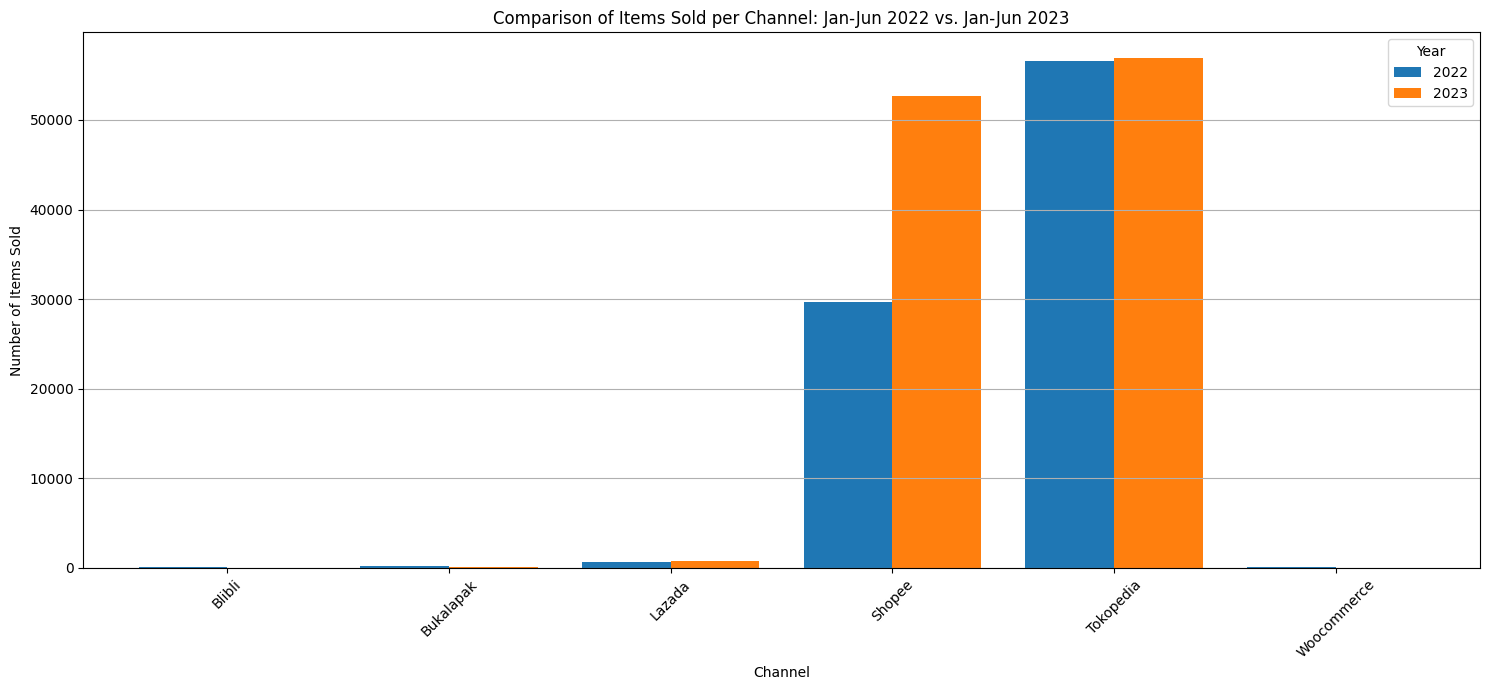

In [ ]:
# Re-plotting the comparison of items sold from January to June in 2022 and 2023 for each channel
items_sold_comparison_jan_to_june.plot(kind='bar', figsize=(15, 7), color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('Comparison of Items Sold per Channel: Jan-Jun 2022 vs. Jan-Jun 2023')
plt.xlabel('Channel')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Year')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Simpan ke file CSV
df.to_csv('Mega Jaya x Narasio Data Clean.csv', index=False)